

# Well Logging Data (EDA, Visualization)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
!pip install lasio
!pip install mplstereonet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 13.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for mplstereonet: filename=mplstereonet-0.6.3-py3-none-any.whl size=38372 sha256=63cdbd47d394bb17cf7c586667f3fb6f566e4d8c8dff2f8d3ba17f7dda38673b
  Stored in directory: /root/.cache/pip/wheels/b2/a3/2a/cededd22ff5f7f8afe80e3de785c766166841b4ba36dfaa13c
Successfully built mplstereonet


In [3]:
import lasio 
import mplstereonet as mpl


In [4]:
#data links
well_path= "http://bit.ly/wireline-data"
trajectory_path= "http://bit.ly/trajectory-data"
fracture_path="http://bit.ly/fractures-data"

* Well log data (format=LAS)




# EDA, Preprocessing


In [5]:
# Read LAS well log data
well=lasio.read(well_path)

In [6]:
#display mnemonics of well log
well.curves

[CurveItem(mnemonic="DEPT", unit="m", value="", descr="DEPTH", original_mnemonic="DEPT", data.shape=(21386,)),
 CurveItem(mnemonic="LITHOLOGY_GEOLINK", unit="_", value="", descr="Lithology_geolink", original_mnemonic="LITHOLOGY_GEOLINK", data.shape=(21386,)),
 CurveItem(mnemonic="CALI", unit="in", value="", descr="CALI", original_mnemonic="CALI", data.shape=(21386,)),
 CurveItem(mnemonic="DRHO", unit="g/cm3", value="", descr="DRHO", original_mnemonic="DRHO", data.shape=(21386,)),
 CurveItem(mnemonic="NPHI", unit="m3/m3", value="", descr="NPHI", original_mnemonic="NPHI", data.shape=(21386,)),
 CurveItem(mnemonic="RHOB", unit="g/cm3", value="", descr="RHOB", original_mnemonic="RHOB", data.shape=(21386,)),
 CurveItem(mnemonic="GR", unit="gAPI", value="", descr="GR", original_mnemonic="GR", data.shape=(21386,)),
 CurveItem(mnemonic="DTC", unit="us/ft", value="", descr="DTC", original_mnemonic="DTC", data.shape=(21386,)),
 CurveItem(mnemonic="DTE", unit="us/ft", value="", descr="DTE", origi

In [7]:
# data is in multidimentional array (numpy data)
well.data

array([[4.93493134e+02,            nan, 1.94060001e+01, ...,
        1.54602885e+00,            nan, 1.54602885e+00],
       [4.93645538e+02,            nan, 1.94060001e+01, ...,
        1.57003009e+00,            nan, 1.57003009e+00],
       [4.93797943e+02,            nan, 1.94060001e+01, ...,
        1.59499407e+00,            nan, 1.59499407e+00],
       ...,
       [3.75226196e+03,            nan, 7.55499983e+00, ...,
        3.15799999e+00,            nan, 3.15799999e+00],
       [3.75241431e+03,            nan, 7.55499983e+00, ...,
        3.15799999e+00,            nan, 3.15799999e+00],
       [3.75256665e+03,            nan, 7.55499983e+00, ...,
        3.15799999e+00,            nan, 3.15799999e+00]])

In [8]:
#convert to dataframe to display as table
well_df=well.df().reset_index()

<AxesSubplot:>

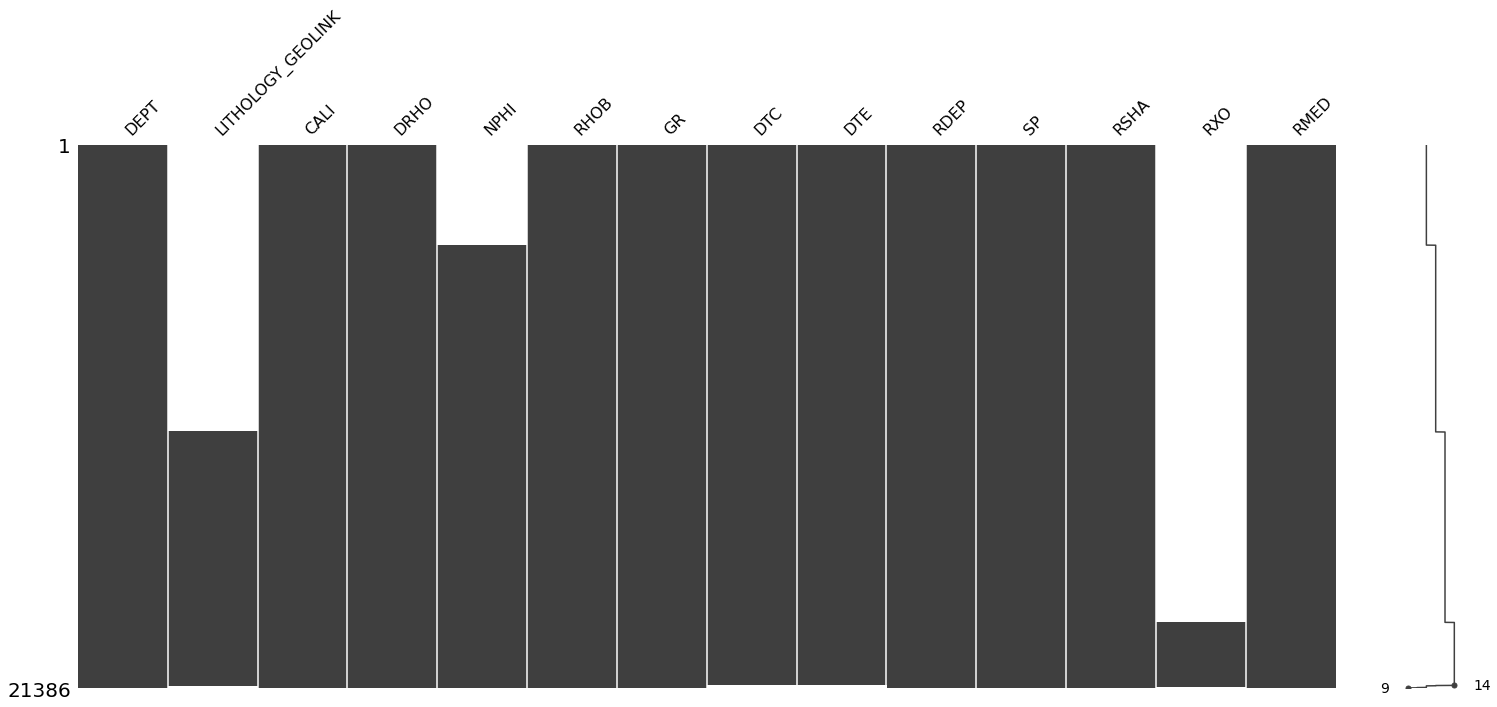

In [9]:
#visualise missing value with missingno package
import missingno as msno
msno.matrix(well_df)



# Visualization


In [10]:
log=["NPHI","RHOB","GR","RDEP","DTC"]
color=["black","green","orange","blue","red"]

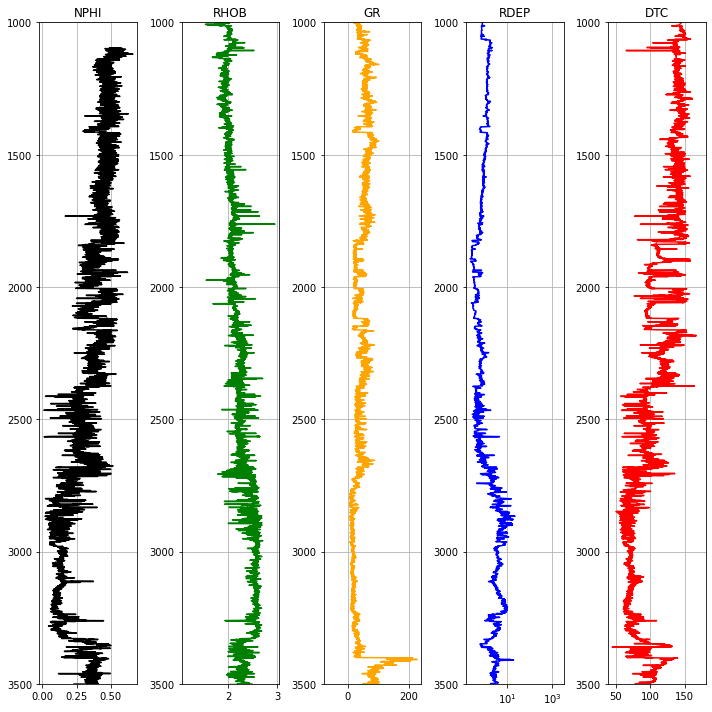

In [11]:
plt.figure(figsize=(10,10))

for i in range(len(log)):
  plt.subplot(1,5,i+1)
  if log[i]=="RDEP":
    #plot in semilog
    plt.semilogx(well[log[i]],well["DEPT"],color=color[i])
  else:
    #plot in normal
    plt.plot(well[log[i]],well["DEPT"],color=color[i])
  # invert depth from lowest to highest (top to bottom)
  plt.ylim(3500,1000)
  plt.title(log[i])
  plt.grid()

plt.tight_layout()
plt.show()



# Wellbore Trajectory


In [12]:
trajectory_df=pd.read_csv(trajectory_path)
trajectory_df.head(10)

,azi,md,tvd,incl,dispNs,dispEw,TVD_calc,surfNs,surfEw
0,0.00,0.0,0.0000,0.00,-3.1700,3.5300,0.000000,6.478560e+06,435053.550000
1,0.00,145.9,145.9000,0.00,-3.1700,3.5300,145.900000,6.478560e+06,435053.550000
2,253.69,153.4,153.4000,0.15,-3.1728,3.5206,153.399991,6.478560e+06,435053.540578
3,146.02,234.2,234.1996,0.28,-3.3662,3.5294,234.199630,6.478560e+06,435053.549412
4,136.21,274.6,274.5978,0.78,-3.6465,3.7749,274.597780,6.478560e+06,435053.794881
5,128.29,315.0,314.9898,1.46,-4.1640,4.3691,314.989847,6.478559e+06,435054.389145
6,124.07,355.3,355.2515,3.41,-5.1536,5.7651,355.251543,6.478558e+06,435055.785053
7,126.98,395.7,395.5379,5.13,-6.9133,8.2034,395.537936,6.478557e+06,435058.223387
8,139.07,436.1,435.7648,5.52,-9.4680,10.9194,435.764783,6.478554e+06,435060.939355
9,152.33,474.4,473.8855,5.62,-12.5207,12.9971,473.885535,6.478551e+06,435063.017149


In [13]:
import plotly.express as px

In [14]:
#x=trajectory_df["surfEw"]; y=trajectory_df["surfNs"]; z=trajectory_df["tvd"]

fig=px.scatter_3d(trajectory_df, x="surfEw",y="surfNs",z="tvd",color="incl")
fig.update_scenes(zaxis_autorange="reversed")
fig.show()


# Natural Fracture Analysis


In [15]:
frac_df=pd.read_csv(fracture_path)

frac_df

,depth,strike,dip,dip_direction,aperture
0,5200.824,228.25,76.41,318.25,4.31
1,5200.965,207.80,86.11,297.80,5.87
2,5205.068,233.97,84.07,323.97,7.22
3,5208.820,206.68,82.67,296.68,5.52
4,5221.970,214.65,77.20,304.65,5.44
5,5232.421,211.99,79.37,301.99,9.95
6,5248.538,214.61,79.88,304.61,12.24
7,5252.678,226.41,84.78,316.41,10.21
8,5269.203,245.50,80.63,335.50,8.22
9,5280.625,238.08,81.70,328.08,2.67


In [16]:
strike=frac_df["strike"]
dip=frac_df["dip"]

* **Visualise stereonet using function defined in fracture.py**

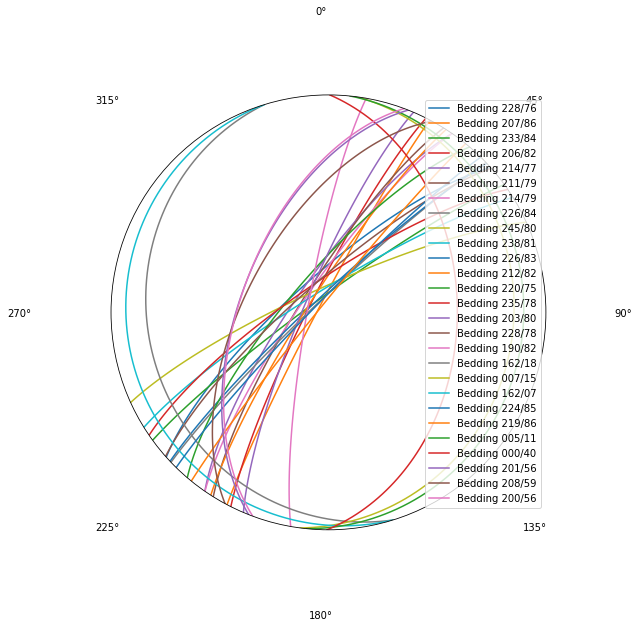

In [17]:

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')
for i in range(0,27):   
    ax.plane(strike[i], dip[i], label='Bedding %03d/%02d' % (strike[i], dip[i]))
ax.legend()

* **Strike is from 0 to 40 degree, dip is around 80 and 90 degree**